# Quest11: 딥러닝 프로젝트

평가문항에 맞춰서 작성
1. Boston 주택 가격 예측 프로젝트를 성공적으로 완료하였는가?
-> 프로젝트의 지시 사항을 따라 데이터 전처리, 모델 구성, 모델 학습을 올바르게 진행하였다.

2. Reuters 데이터의 분류 프로젝트를 성공적으로 완료하였는가?
-> 프로젝트의 지시 사항을 따라 데이터 전처리, 모델 구성, 모델 학습을 올바르게 진행하였다.

3. CIFAR10 데이터의 분류 프로젝트를 성공적으로 완료하였는가?
-> 프로젝트의 지시 사항을 따라 데이터 전처리, 모델 구성, 모델 학습을 올바르게 진행하였다.

# 1. Boston 주택 가격 예측 모델

## Import

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
train_data = train_data - train_data.mean(axis=0)


# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
train_data = train_data / train_data.std(axis=0)
print(train_data)

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data - test_data.mean(axis=0)


# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
test_data = test_data / test_data.std(axis=0)
print(test_data)

[[-0.27224633 -0.48361547 -0.43576161 ...  1.14850044  0.44807713
   0.8252202 ]
 [-0.40342651  2.99178419 -1.33391162 ... -1.71818909  0.43190599
  -1.32920239]
 [ 0.1249402  -0.48361547  1.0283258  ...  0.78447637  0.22061726
  -1.30850006]
 ...
 [-0.40202987  0.99079651 -0.7415148  ... -0.71712291  0.07943894
  -0.67776904]
 [-0.17292018 -0.48361547  1.24588095 ... -1.71818909 -0.98764362
   0.42083466]
 [-0.40422614  2.04394792 -1.20161456 ... -1.30866202  0.23317118
  -1.15392266]]
[[ 2.8040301  -0.50784934  0.96960877 ...  0.90513041 -4.27829517
   2.51324773]
 [-0.55530596 -0.50784934 -0.17801704 ... -0.28485844  0.3909446
   0.58604286]
 [-0.56808398 -0.50784934 -0.86176938 ...  0.90513041  0.41570668
  -0.38506427]
 ...
 [-0.23539182 -0.50784934  1.17955762 ... -1.82192738  0.32313459
  -1.55879807]
 [-0.5113909  -0.50784934 -0.71849348 ... -0.48318992  0.34967446
  -0.38956708]
 [-0.03148414 -0.50784934  1.17955762 ... -1.82192738 -1.57465677
  -0.3745577 ]]


In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse',metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
EPOCHS = 60
BATCH_SIZE = 32
history = model.fit(train_data, train_labels, 
            epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, verbose=0)

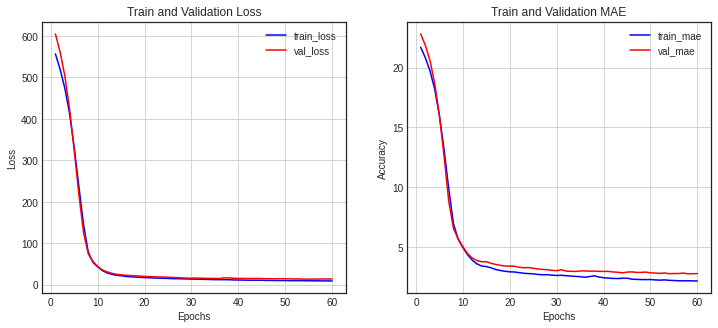

In [6]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [7]:
test_loss, test_mae = model.evaluate(test_data, test_labels)

print(f'Test Loss: {test_loss}')
print(f'Test Mean Absolute Error: {test_mae}')

4/4 [==============================] - 0s 2ms/step - loss: 21.5604 - mae: 3.1172
Test Loss: 21.56035614013672
Test Mean Absolute Error: 3.1172423362731934


# 2. Reuters 딥러닝 모델

## Import

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [10]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


In [11]:
from tensorflow.keras.utils import to_categorical
import numpy as np

# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
    results = []
    for sequence in data:
        # 0으로 초기화된 크기가 dim인 벡터 생성
        one_hot_vector = [0] * dim
        # 현재 시퀀스에서 나타난 단어에 해당하는 인덱스를 1로 설정
        for index in sequence:
            one_hot_vector[index] = 1
        results.append(one_hot_vector)
    return np.array(results)

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train_categorical = to_categorical(train_labels)
y_val_categorical = to_categorical(val_labels)
y_test_categorical = to_categorical(test_labels)


In [12]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

# 모델 구성
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_cb = ModelCheckpoint("best_model.h5", save_best_only=True)

early_stopping_cb = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    x_train, y_train_categorical,
    epochs=50,
    batch_size=256,
    validation_data=(x_val, y_val_categorical),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/50
27/27 [==============================] - 1s 32ms/step - loss: 3.6620 - accuracy: 0.1891 - val_loss: 3.4554 - val_accuracy: 0.5637
Epoch 2/50
27/27 [==============================] - 0s 15ms/step - loss: 2.2070 - accuracy: 0.5395 - val_loss: 2.8575 - val_accuracy: 0.6817
Epoch 3/50
27/27 [==============================] - 0s 15ms/step - loss: 1.6484 - accuracy: 0.6563 - val_loss: 2.4227 - val_accuracy: 0.6986
Epoch 4/50
27/27 [==============================] - 0s 15ms/step - loss: 1.3869 - accuracy: 0.7061 - val_loss: 2.0810 - val_accuracy: 0.7102
Epoch 5/50
27/27 [==============================] - 0s 15ms/step - loss: 1.1914 - accuracy: 0.7396 - val_loss: 1.8488 - val_accuracy: 0.7182
Epoch 6/50
27/27 [==============================] - 0s 14ms/step - loss: 1.0552 - accuracy: 0.7712 - val_loss: 1.6606 - val_accuracy: 0.7257
Epoch 7/50
27/27 [==============================] - 0s 14ms/step - loss: 0.9609 - accuracy: 0.7868 - val_loss: 1.4728 - val_accuracy: 0.7351
Epoch 8/50
27

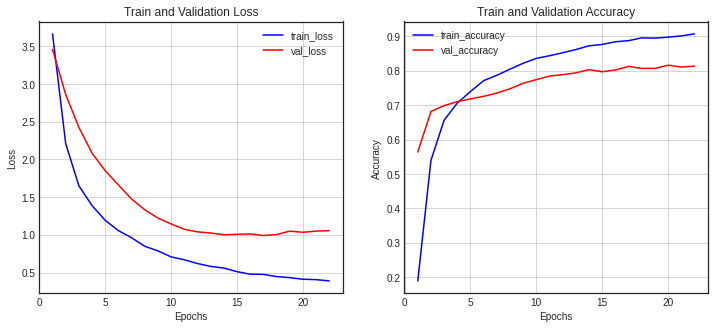

In [14]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [15]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
test_loss, test_accuracy = model.evaluate(x_test, np.array(y_test_categorical))

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

71/71 [==============================] - 0s 3ms/step - loss: 1.0930 - accuracy: 0.7809
Test Loss: 1.0929644107818604
Test Accuracy: 0.7809438705444336


# 3. CIFAR10 딥러닝 모델

## Import

In [16]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [17]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
# CIFAR-10 데이터 로드
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 훈련 데이터를 훈련 세트와 검증 세트로 분리 (20%를 검증 세트로 사용)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.20, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [18]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

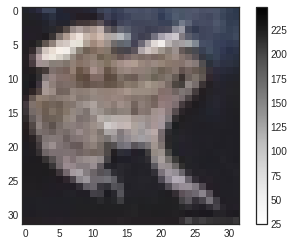

In [19]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [20]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [21]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
# 훈련 데이터 형태 변형
x_train = x_train.reshape((x_train.shape[0], 32 * 32 * 3))

# 검증 데이터 형태 변형
x_val = x_val.reshape((x_val.shape[0], 32 * 32 * 3))

x_test = x_test.reshape((x_test.shape[0], 32 * 32 * 3))

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [22]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [23]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

# 모델 구성
model = Sequential()
# 입력 레이어
model.add(Flatten(input_shape=(32, 32, 3)))

# 은닉 레이어
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# 출력 레이어
model.add(Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               1573376   
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              

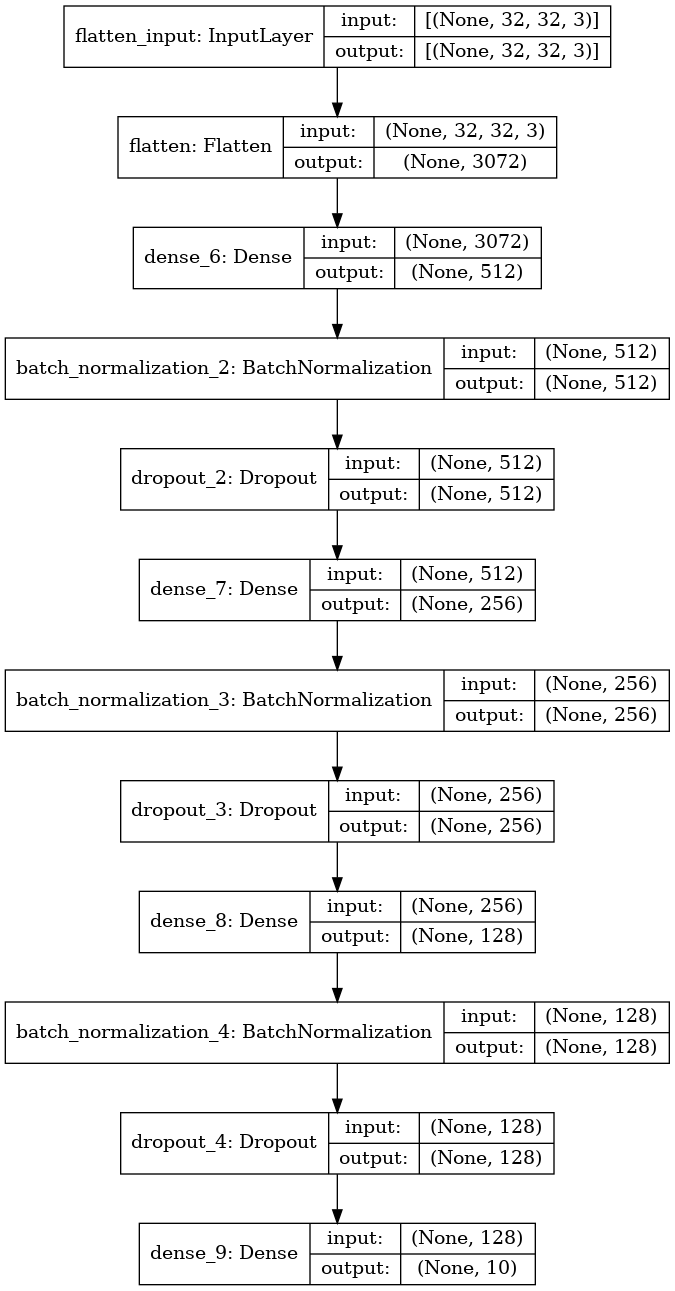

In [24]:
utils.plot_model(model, show_shapes=True)

In [25]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# ModelCheckpoint: 검증 정확도(val_accuracy)가 개선되면 모델을 저장하는 콜백
checkpoint_cb = ModelCheckpoint("best_model.h5", save_best_only=True)

# EarlyStopping: 검증 손실(val_loss)이 더 이상 개선되지 않으면 학습을 조기 종료하는 콜백
early_stopping_cb = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 모델 학습
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/50
313/313 [==============================] - 3s 7ms/step - loss: 2.4003 - accuracy: 0.2338 - val_loss: 1.8854 - val_accuracy: 0.3142
Epoch 2/50
313/313 [==============================] - 2s 6ms/step - loss: 1.9131 - accuracy: 0.3173 - val_loss: 1.9784 - val_accuracy: 0.2951
Epoch 3/50
313/313 [==============================] - 2s 6ms/step - loss: 1.8211 - accuracy: 0.3479 - val_loss: 1.7494 - val_accuracy: 0.3610
Epoch 4/50
313/313 [==============================] - 2s 6ms/step - loss: 1.7792 - accuracy: 0.3612 - val_loss: 1.7268 - val_accuracy: 0.3691
Epoch 5/50
313/313 [==============================] - 2s 6ms/step - loss: 1.7643 - accuracy: 0.3689 - val_loss: 1.7266 - val_accuracy: 0.3784
Epoch 6/50
313/313 [==============================] - 2s 6ms/step - loss: 1.7491 - accuracy: 0.3728 - val_loss: 1.7188 - val_accuracy: 0.3895
Epoch 7/50
313/313 [==============================] - 2s 6ms/step - loss: 1.7351 - accuracy: 0.3795 - val_loss: 1.7340 - val_accuracy: 0.3651
Epoch 

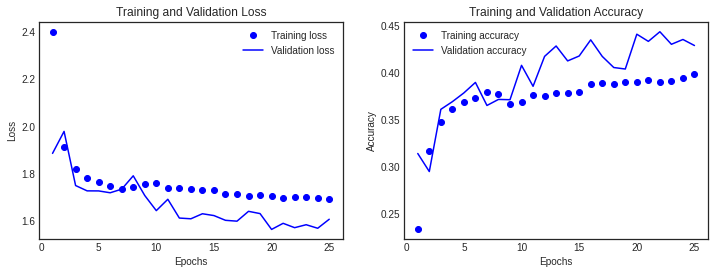

In [26]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
import matplotlib.pyplot as plt

# 학습 히스토리에서 loss와 val_loss 추출
loss = history.history['loss']
val_loss = history.history['val_loss']

# 학습 히스토리에서 accuracy와 val_accuracy 추출
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 에포크 수
epochs = range(1, len(loss) + 1)

# Loss 그래프
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [27]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5513 - accuracy: 0.4438


[1.5513198375701904, 0.4438000023365021]

# 회고

모델을 Dense만 사용해서 만들다 보니 loss, accuracy가 많이 좋아지지 않는 것으로 보인다.

어려운 점: data의 shape를 맞추는 과정이 쉽지 않았다..